In [228]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [229]:
X = np.arange(12)

In [230]:
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [231]:
Y = X.reshape((2, 2, 3))

In [232]:
print(Y)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [233]:
Y.ndim

3

In [234]:
X.reshape(-1, 2)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [235]:
# X.reshape(-1, 5)

**Difference between features and labels**

| Features                      | Labels                        |
|-------------------------------|-------------------------------|
| Input variables (X)           | Output variables (Y)          |

In [236]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([1.5, 3.2, 4.8, 6.4, 8.0, 4, 8.3, 8.4, 8.9, 10])

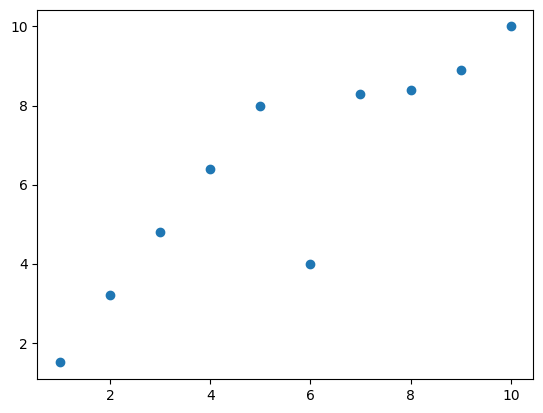

In [237]:
plt.scatter(X, Y)

**How to find linear relation?**

$`m = \frac {n \Sigma x_i y_i - \Sigma x_i \Sigma y_i} {n \Sigma x_i^2 - (\Sigma x_i)^2}`$
<br>
$`b = \frac {\Sigma y - m \Sigma x_i} {n}`$
<br>
Then we can use the straight line formula: $`y = mx + b`$

In [238]:
if len(X) == len(Y):
    n = len(X)
else:
    raise ValueError("X and Y should be of the same length")

In [239]:
sum_xi_yi = 0

for i in range(n):
    sum_xi_yi += X[i] * Y[i]

In [240]:
sum_xi_sum_yi = sum(X) * sum(Y)

In [241]:
sum_xi_xi = sum(i*i for i in X)

In [242]:
sum_xi_sum_xi = sum(X) * sum(X)

In [243]:
m = (n * sum_xi_yi - sum_xi_sum_yi) / (n * sum_xi_xi - sum_xi_sum_xi)

In [244]:
display(m)

np.float64(0.8248484848484848)

In [245]:
b = (sum(Y) - m * sum(X)) / n

In [246]:
display(b)

np.float64(1.8133333333333332)

In [247]:
regression_x = np.arange(0, 10, 0.2)

regression_y = np.array([m*x + b for x in regression_x])

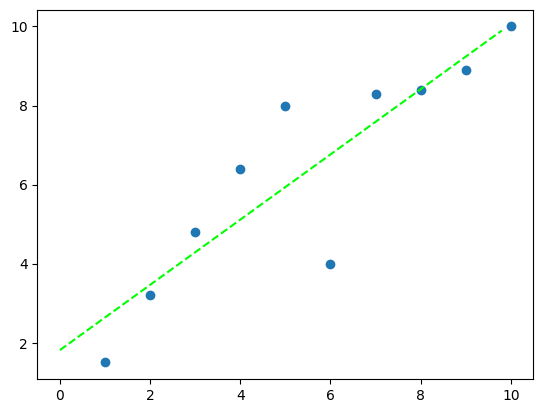

In [248]:
plt.plot(regression_x, regression_y, color='lime', linestyle='--')
plt.scatter(X, Y)

In [249]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)

LinearRegression()

In [250]:
model.coef_

array([0.82484848])

In [251]:
model.intercept_

np.float64(1.8133333333333326)

In [252]:
def get_salary(years: float) -> float:
    return model.predict([[years]])

In [253]:
print(f"Salary: {get_salary(50)[0]:.2f}L")

Salary: 43.06L
